<a href="https://colab.research.google.com/github/AleThompsonO/BA_Data_Science_virtual_experience_programme/blob/main/WebScraping_Reviews_(BA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Web Scraping Reviews British Airways**
#####*SOLELY FOR PURPOSES OF FORAGE WORK EXPERIENCE*
## By: J. Alejandro Thompson Oporto

# Data Manipulation

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import plotly.express as px
from collections import Counter
from PIL import Image
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

In [ ]:
reviews = []
aircraft = []
typeOfTraveler = []
seatType = []
route = []
date = []
recommend = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for table in parsed_content.find_all('table', {'class': 'review-ratings'}):
        review = []
        categories = [aircraft, typeOfTraveler, seatType, route, date, recommend]

        for a in table.find_all('td', {'class': 'review-value'}):
            review.append(a.text)

        if review != []:
            if len(review) == 5:
                aircraft.append("Null")
                typeOfTraveler.append(review[0])
                seatType.append(review[1])
                route.append(review[2])
                date.append(review[3])
                recommend.append(review[4])
            elif len(review) == 6:
                aircraft.append(review[0])
                typeOfTraveler.append(review[1])
                seatType.append(review[2])
                route.append(review[3])
                date.append(review[4])
                recommend.append(review[5])

max_len = max(len(reviews), len(aircraft), len(typeOfTraveler), len(seatType), len(route), len(date), len(recommend))
for lst in [reviews, aircraft, typeOfTraveler, seatType, route, date, recommend]:
    if len(lst) < max_len:
        lst.extend([None] * (max_len - len(lst)))

df = pd.DataFrame()
df["reviews"] = reviews
df["aircraft"] = aircraft
df["Type of Traveler"] = typeOfTraveler
df["Seat Type"] = seatType
df["Route"] = route
df["Date"] = date
df["Recommend"] = recommend
print(df.head())

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
                                             reviews         aircraft  \
0  ✅ Trip Verified |  My family and I have flown ...       Boeing 777   
1  ✅ Trip Verified |  This has been by far the wo...          A321neo   
2  ✅ Trip Verified |  In Nov 2022 I booked and pa...             Null   
3  Not Verified | BA is not treating its premium ...  Boeing 777 -200   
4  ✅ Trip Verified |  24 hours before our departu...   Boeing 777-200   

  Type of Traveler        Seat Type                         Route  \
0   Couple Leisure  Premium Economy            Chennai to London    
1   Couple Leisure    Economy Class            Istanbul to London   
2     Solo Leisure    Economy Class           London to Edinburgh   
3   Family Leisure  Premium Economy            Kingston to London   
4   Couple Leisure    Economy Class  London Heathrow to

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews           1000 non-null   object
 1   aircraft          996 non-null    object
 2   Type of Traveler  996 non-null    object
 3   Seat Type         996 non-null    object
 4   Route             996 non-null    object
 5   Date              996 non-null    object
 6   Recommend         996 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
df.head()

,reviews,aircraft,Type of Traveler,Seat Type,Route,Date,Recommend
0,✅ Trip Verified | My family and I have flown ...,Boeing 777,Couple Leisure,Premium Economy,Chennai to London,July 2023,no
1,✅ Trip Verified | This has been by far the wo...,A321neo,Couple Leisure,Economy Class,Istanbul to London,July 2023,no
2,✅ Trip Verified | In Nov 2022 I booked and pa...,Null,Solo Leisure,Economy Class,London to Edinburgh,November 2022,no
3,Not Verified | BA is not treating its premium ...,Boeing 777 -200,Family Leisure,Premium Economy,Kingston to London,June 2023,no
4,✅ Trip Verified | 24 hours before our departu...,Boeing 777-200,Couple Leisure,Economy Class,London Heathrow to Cape Town,June 2023,no


In [ ]:
# Remove the emoji at the beginning of each review
df["reviews"] = df["reviews"].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

In [ ]:
# Split the "reviews" column into two columns separated by the character "|".
df[['State of Trip', 'Review']] = df['reviews'].str.split('|', expand=True)

# Delete the original "reviews" column
df = df.drop('reviews', axis=1)

In [ ]:
# We add data manually so that the data is correct.
df.loc[996] = ['Airbus A32', 'Solo Leisure', 'Economy Class', 'London Heathrow to Budapest', 'August 2018', 'yes', df.loc[996]['State of Trip'], df.loc[996]['Review']]
df.loc[997] = ['A320', 'Solo Leisure', 'Economy Class', 'Budapest to London Heathrow', 'September 2018', 'yes', df.loc[997]['State of Trip'], df.loc[997]['Review']]
df.loc[998] = ['A319 / Boeing 787-9', 'Family Leisure', 'Business Class', 'Pisa to Toronto via London', 'September 2018', 'yes', df.loc[998]['State of Trip'], df.loc[998]['Review']]
df.loc[999] = ['Null', 'Business', 'Business Class', 'Madrid to Heathrow', 'August 2018', 'no', df.loc[999]['State of Trip'], df.loc[999]['Review']]

In [ ]:
# Clear the second part of each review
df["Review"] = df["Review"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
# Remove the blanks at the beginning and end of the values in the "State of Trip" column.
df['State of Trip'] = df['State of Trip'].str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   aircraft          1000 non-null   object
 1   Type of Traveler  1000 non-null   object
 2   Seat Type         1000 non-null   object
 3   Route             1000 non-null   object
 4   Date              1000 non-null   object
 5   Recommend         1000 non-null   object
 6   State of Trip     1000 non-null   object
 7   Review            1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [ ]:
df.columns

Index(['aircraft', 'Type of Traveler', 'Seat Type', 'Route', 'Date',
       'Recommend', 'State of Trip', 'Review'],
      dtype='object')

#Data analysis

###What is the distribution of traveler types in the reviews?

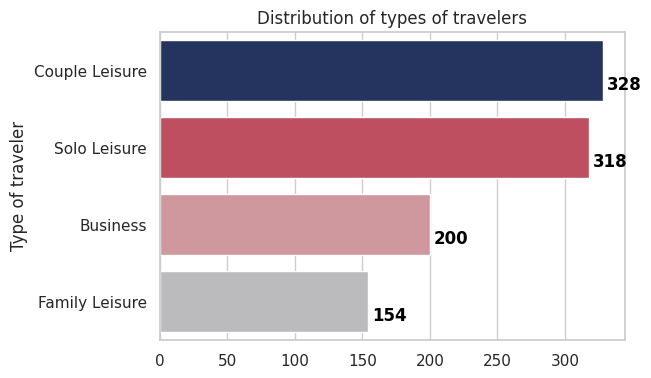

In [ ]:
# We count the types of travelers
traveler_counts = df['Type of Traveler'].value_counts()

# We design the graphic with the company colors
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=traveler_counts.values, y=traveler_counts.index, palette=["#1C2F67","#D03C54","#D98D97","#BBBABF" ])
ax.set_title('Distribution of types of travelers')
ax.set_ylabel('Type of traveler')

# Add tags with values
for i, v in enumerate(traveler_counts.values):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.show()

###What is the distribution of positive and negative comments on the types of travelers?

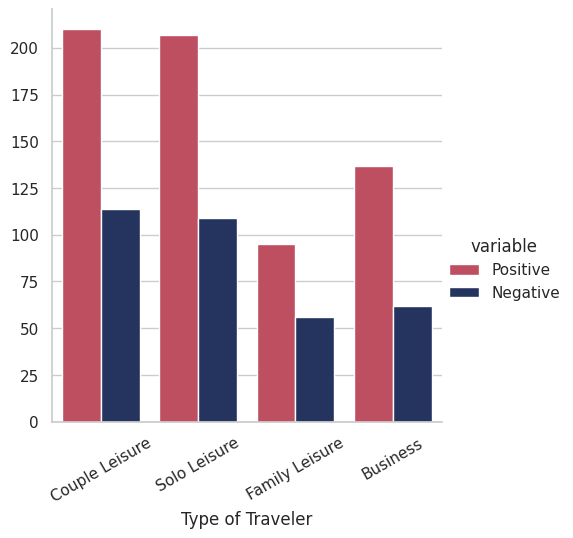

In [ ]:
traveler_types = df['Type of Traveler'].unique()
polarity_data = []

for traveler_type in traveler_types:
    # We will filter the reviews by type of traveler.
    reviews = df[df['Type of Traveler'] == traveler_type]['Review']

    # The polarity of each review must be calculated
    polarity = [TextBlob(review).sentiment.polarity for review in reviews]

    # We classify reviews as positive or negative
    positive = sum(1 for p in polarity if p > 0)
    negative = sum(1 for p in polarity if p < 0)

    # Add data to a list
    polarity_data.append([traveler_type, positive, negative])

# We create a df with the data
polarity_df = pd.DataFrame(polarity_data, columns=['Type of Traveler', 'Positive', 'Negative'])

# We design the graphic
sns.set(style="whitegrid")
g = sns.catplot(x="Type of Traveler", y="value", hue="variable", data=pd.melt(polarity_df, ['Type of Traveler']), kind="bar", palette=["#D03C54", "#1C2F67"])
g.set_titles("{col_name}")
g.set_ylabels("")
g.set_xticklabels(rotation=30)


plt.show()

###What are the words that appear most frequently by type of traveler?

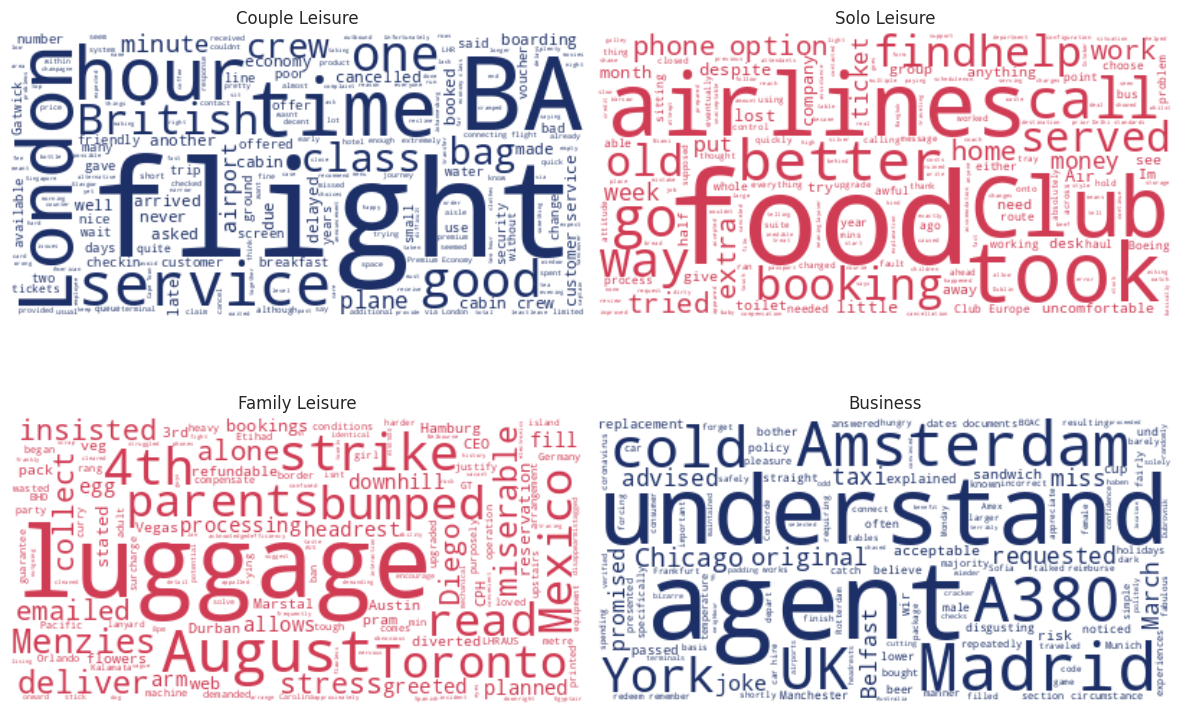

In [ ]:
# We identify unique values
traveler_types = df['Type of Traveler'].unique()

#  We will create a figure with several subplots to show the word clouds.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.subplots_adjust(wspace=0.02, hspace=-0.5)
axs = axs.ravel()

# We will create a dictionary to store the word count by type of traveler.
word_counts = {}

for traveler_type in traveler_types:
    # We will filter the reviews by type of traveler.
    reviews = df[df['Type of Traveler'] == traveler_type]['Review']

    # Word processing
    text = ' '.join(review for review in reviews)
    words = text.split()

    # Counting words
    word_counts[traveler_type] = Counter(words)

# We will create a set of words to exclude (those words that appear in more than one word cloud) We will seek to avoid bias
exclude_words = set()
for word in set.union(*[set(counts.keys()) for counts in word_counts.values()]):
    max_count = 0
    max_traveler_type = None
    for traveler_type, counts in word_counts.items():
        if counts[word] > max_count:
            max_count = counts[word]
            max_traveler_type = traveler_type
    for traveler_type in traveler_types:
        if traveler_type != max_traveler_type:
            exclude_words.add((traveler_type, word))

colors = ["#1C2F67","#D03C54","#D03C54","#1C2F67"]
for i, traveler_type in enumerate(traveler_types):
    # We will filter the reviews by type of traveler.
    reviews = df[df['Type of Traveler'] == traveler_type]['Review']

    # Word processing
    text = ' '.join(review for review in reviews)
    stopwords = set(STOPWORDS)

    # We will add the words to exclude to the stopwords list
    stopwords.update([word for t, word in exclude_words if t == traveler_type])

    # We will use the brand colors
    color_image = np.array(Image.new('RGB', (800, 600), colors[i]))

    # We will create a function to generate colors from the image
    image_colors = ImageColorGenerator(color_image)

    # Create the word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", color_func=image_colors).generate(text)

    # Show wordcloud
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(traveler_type)
    axs[i].axis("off")

plt.show()

###What is the distribution of seat types?

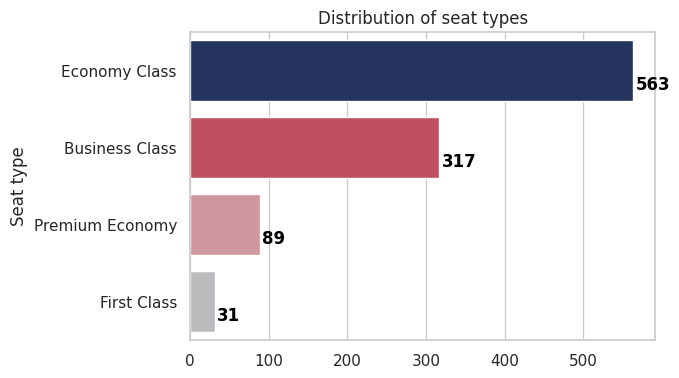

In [ ]:
# We count the types of seat
seat_counts = df['Seat Type'].value_counts()

# We design the graphic with the company colors
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=seat_counts.values, y=seat_counts.index, palette=["#1C2F67","#D03C54","#D98D97","#BBBABF" ])
ax.set_title('Distribution of seat types')
ax.set_ylabel('Seat type')

# Add tags with values
for i, v in enumerate(seat_counts.values):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.show()

###What is the distribution of positive and negative comments on seat types?

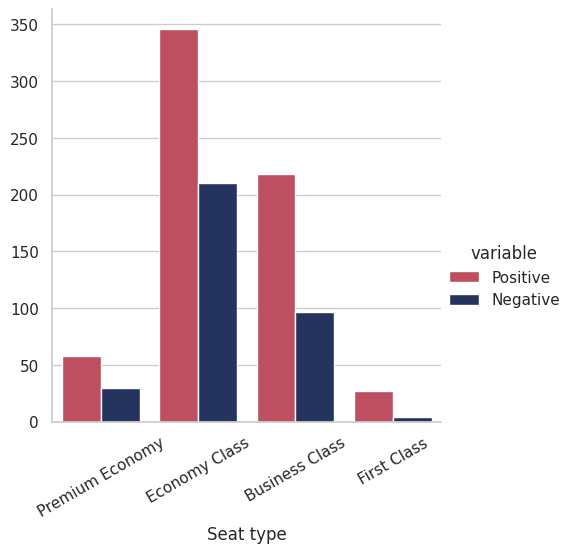

In [ ]:
seat_types = df['Seat Type'].unique()
polarity_data = []

for seat_type in seat_types:
    # We will filter the reviews by seat type.
    reviews = df[df['Seat Type'] == seat_type]['Review']

    # The polarity of each review must be calculated
    polarity = [TextBlob(review).sentiment.polarity for review in reviews]

    # We classify reviews as positive or negative
    positive = sum(1 for p in polarity if p > 0)
    negative = sum(1 for p in polarity if p < 0)

    # Add data to a list
    polarity_data.append([seat_type, positive, negative])

# We create a df with the data
polarity_df = pd.DataFrame(polarity_data, columns=['Seat type', 'Positive', 'Negative'])

# We design the graphic
sns.set(style="whitegrid")
g = sns.catplot(x="Seat type", y="value", hue="variable", data=pd.melt(polarity_df, ['Seat type']), kind="bar", palette=["#D03C54", "#1C2F67"])
g.set_titles("{col_name}")
g.set_ylabels("")
g.set_xticklabels(rotation=30)

plt.show()

###What are the most frequently occurring words by seat type?

In [ ]:
# We identify unique values
seat_types = df['Seat Type'].unique()

#  We will create a figure with several subplots to show the word clouds.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.subplots_adjust(wspace=0.02, hspace=-0.5)
axs = axs.ravel()

# We will create a dictionary to store the word count by type of traveler.
word_counts = {}

for seat_type in seat_types:
    # We will filter the reviews by seat type.
    reviews = df[df['Seat Type'] == seat_type]['Review']

    # Word processing
    text = ' '.join(review for review in reviews)
    words = text.split()

    # Counting words
    word_counts[seat_type] = Counter(words)

# We will create a set of words to exclude (those words that appear in more than one word cloud) We will seek to avoid bias
exclude_words = set()
for word in set.union(*[set(counts.keys()) for counts in word_counts.values()]):
    max_count = 0
    max_seat_type = None
    for seat_type, counts in word_counts.items():
        if counts[word] > max_count:
            max_count = counts[word]
            max_seat_type = seat_type
    for seat_type in seat_types:
        if seat_type != max_seat_type:
            exclude_words.add((seat_type, word))

colors = ["#1C2F67","#D03C54","#D03C54","#1C2F67"]
for i, seat_type in enumerate(seat_types):
    # We will filter the reviews by seat type.
    reviews = df[df['Seat Type'] == seat_type]['Review']

    # Word processing
    text = ' '.join(review for review in reviews)
    stopwords = set(STOPWORDS)

    # We will add the words to exclude to the stopwords list
    stopwords.update([word for t, word in exclude_words if t == seat_type])

    # We will use the brand colors
    color_image = np.array(Image.new('RGB', (800, 600), colors[i]))

    # We will create a function to generate colors from the image
    image_colors = ImageColorGenerator(color_image)

    # Create the word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", color_func=image_colors).generate(text)

    # Show wordcloud
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(seat_type)
    axs[i].axis("off")

plt.show()

###What is the distribution of the recommendations?

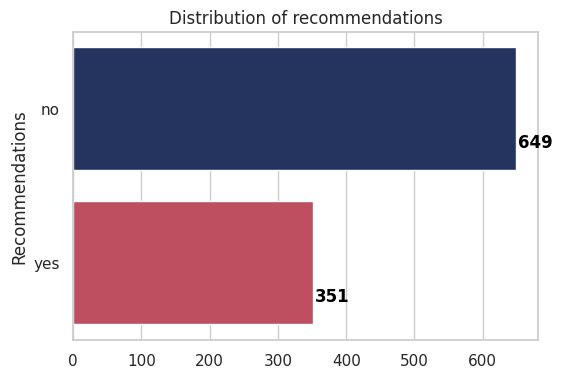

In [ ]:
# We count the reommendations
recommend_counts = df['Recommend'].value_counts()

# We design the graphic with the company's colors.
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=recommend_counts.values, y=recommend_counts.index, palette=["#1C2F67","#D03C54","#D98D97","#BBBABF" ])
ax.set_title('Distribution of recommendations')
ax.set_ylabel('Recommendations')

# We add tags with values
for i, v in enumerate(recommend_counts.values):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.show()

###What is the distribution of positive and negative comments on the recommendations?

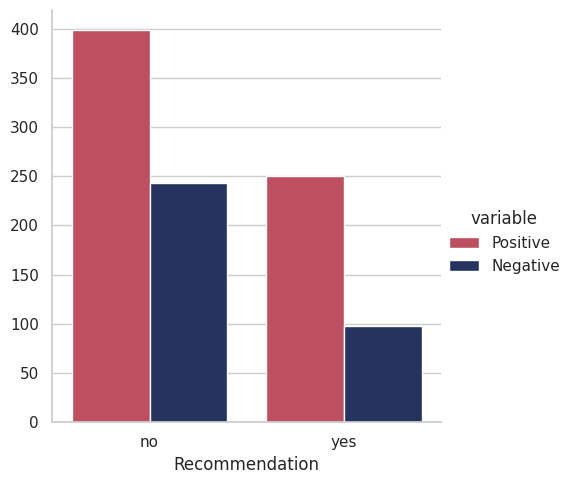

In [ ]:
recommendations = df['Recommend'].unique()
polarity_data = []

for recommendation in recommendations:
    # We filter reviews by recommendation.
    reviews = df[df['Recommend'] == recommendation]['Review']

    # The polarity of each revision must be calculated
    polarity = [TextBlob(review).sentiment.polarity for review in reviews]

    # We classify the reviews as positive or negative
    positive = sum(1 for p in polarity if p > 0)
    negative = sum(1 for p in polarity if p < 0)

    # We add the data to a list
    polarity_data.append([recommendation, positive, negative])

# We create a df with the data
polarity_df = pd.DataFrame(polarity_data, columns=['Recommendation', 'Positive', 'Negative'])

# We design the graphic
sns.set(style="whitegrid")
g = sns.catplot(x="Recommendation", y="value", hue="variable", data=pd.melt(polarity_df, ['Recommendation']), kind="bar", palette=["#D03C54", "#1C2F67"])
g.set_titles("{col_name}")
g.set_ylabels("")
g.set_xlabels("Recommendation")
g.set_xticklabels(rotation=0)

plt.show()

###What are the most frequent words by type of recommendation?

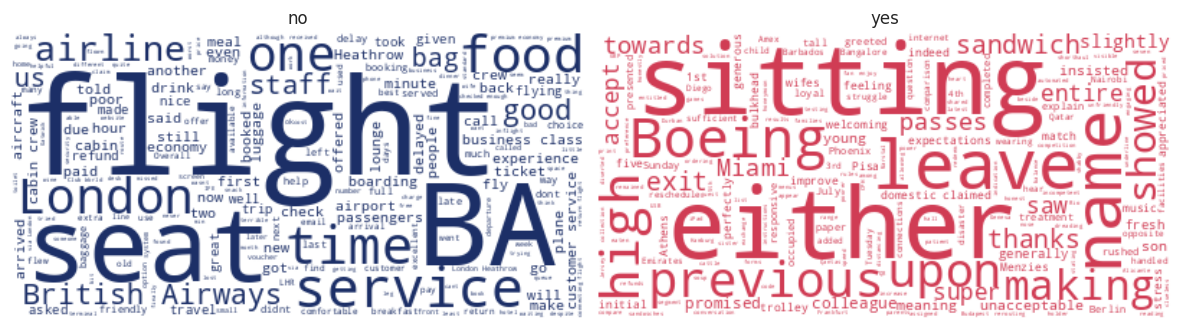

In [ ]:
# We identify unique values
recommendations = df['Recommend'].unique()

# We will create a figure with several subplots to show the word clouds.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5))
fig.subplots_adjust(wspace=0.02, hspace=-0.5)
axs = axs.ravel()

# We will create a dictionary to store the word count by type of traveler.
word_counts = {}

for recommendation in recommendations:
    # We will filter the reviews by recommendation.
    reviews = df[df['Recommend'] == recommendation]['Review']

    # Word processing
    text = ' '.join(review for review in reviews)
    words = text.split()

    # Counting words
    word_counts[recommendation] = Counter(words)

# We will create a set of words to exclude (those words that appear in more than one word cloud) We will seek to avoid bias
exclude_words = set()
for word in set.union(*[set(counts.keys()) for counts in word_counts.values()]):
    max_count = 0
    max_recommendation = None
    for recommendation, counts in word_counts.items():
        if counts[word] > max_count:
            max_count = counts[word]
            max_recommendation = recommendation
    for recommendation in recommendations:
        if recommendation != max_recommendation:
            exclude_words.add((recommendation, word))

colors = ["#1C2F67","#D03C54"]
for i, recommendation in enumerate(recommendations):
    # We will filter the reviews by recommendation.
    reviews = df[df['Recommend'] == recommendation]['Review']

    # Word processing
    text = ' '.join(review for review in reviews)
    stopwords = set(STOPWORDS)

    # We will add the words to exclude to the stopwords list
    stopwords.update([word for t, word in exclude_words if t == recommendation])

    # We will use the brand colors
    color_image = np.array(Image.new('RGB', (800, 600), colors[i]))

    # We will create a function to generate colors from the image
    image_colors = ImageColorGenerator(color_image)

    # Create the word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", color_func=image_colors).generate(text)

    # Show wordcloud
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(recommendation)
    axs[i].axis("off")

plt.show()

###What is the distribution of trip status?

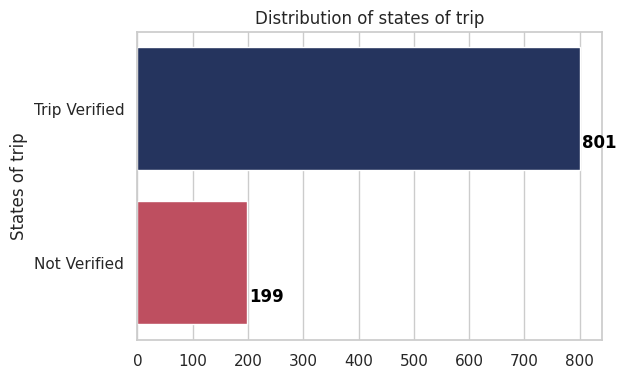

In [ ]:
# We count the states of trip
state_of_trip_counts = df['State of Trip'].value_counts()

# We design the graphic with the company's colors.
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=state_of_trip_counts.values, y=state_of_trip_counts.index, palette=["#1C2F67","#D03C54","#D98D97","#BBBABF" ])
ax.set_title('Distribution of states of trip')
ax.set_ylabel('States of trip')

# We add tags with values
for i, v in enumerate(state_of_trip_counts.values):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.show()

###What is the distribution of positive and negative comments by trip status?

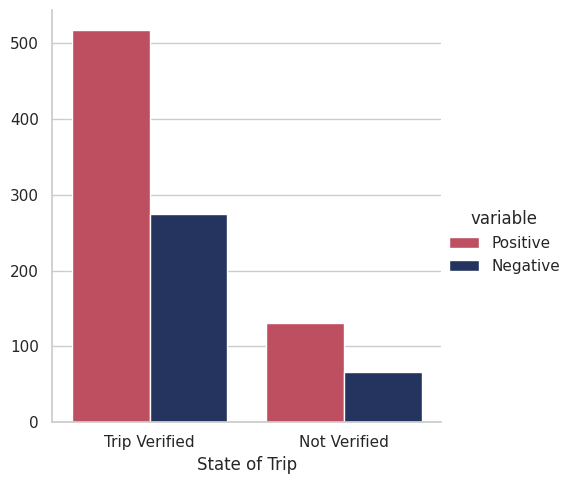

In [ ]:
states_of_trip = df['State of Trip'].unique()
polarity_data = []

for state_of_trip in states_of_trip:
    # We filter reviews by state of trip.
    reviews = df[df['State of Trip'] == state_of_trip]['Review']

    # The polarity of each revision must be calculated
    polarity = [TextBlob(review).sentiment.polarity for review in reviews]

    # We classify the reviews as positive or negative
    positive = sum(1 for p in polarity if p > 0)
    negative = sum(1 for p in polarity if p < 0)

    # We add the data to a list
    polarity_data.append([state_of_trip, positive, negative])

# We create a df with the data
polarity_df = pd.DataFrame(polarity_data, columns=['State of Trip', 'Positive', 'Negative'])

# We design the graphic
sns.set(style="whitegrid")
g = sns.catplot(x="State of Trip", y="value", hue="variable", data=pd.melt(polarity_df, ['State of Trip']), kind="bar", palette=["#D03C54", "#1C2F67"])
g.set_titles("{col_name}")
g.set_ylabels("")
g.set_xlabels("State of Trip")
g.set_xticklabels(rotation=0)

plt.show()

###What are the most frequent words by trip state?

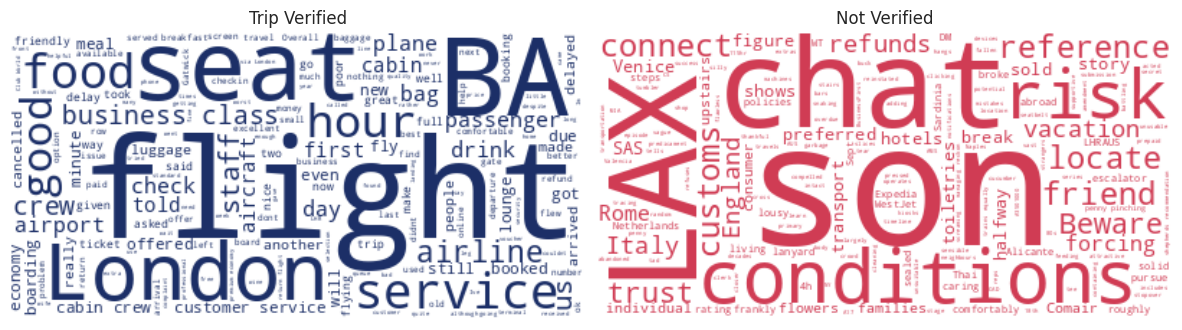

In [ ]:
# We identify unique values
states_of_trip = df['State of Trip'].unique()

# We will create a figure with several subplots to show the word clouds.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5))
fig.subplots_adjust(wspace=0.02, hspace=-0.5)
axs = axs.ravel()

# We will create a dictionary to store the word count by type of traveler.
word_counts = {}

for state_of_trip in states_of_trip:
    # We will filter the reviews by state of trip.
    reviews = df[df['State of Trip'] == state_of_trip]['Review']

    # Word processing
    text = ' '.join(review for review in reviews)
    words = text.split()

    # Counting words
    word_counts[state_of_trip] = Counter(words)

# We will create a set of words to exclude (those words that appear in more than one word cloud) We will seek to avoid bias
exclude_words = set()
for word in set.union(*[set(counts.keys()) for counts in word_counts.values()]):
    max_count = 0
    max_state_of_trip = None
    for state_of_trip, counts in word_counts.items():
        if counts[word] > max_count:
            max_count = counts[word]
            max_state_of_trip = state_of_trip
    for state_of_trip in states_of_trip:
        if state_of_trip != max_state_of_trip:
            exclude_words.add((state_of_trip, word))

colors = ["#1C2F67","#D03C54"]
for i, state_of_trip in enumerate(states_of_trip):
    # We will filter the reviews by state of trip.
    reviews = df[df['State of Trip'] == state_of_trip]['Review']

    # Word processing
    text = ' '.join(review for review in reviews)
    stopwords = set(STOPWORDS)

    # We will add the words to exclude to the stopwords list
    stopwords.update([word for t, word in exclude_words if t == state_of_trip])

    # We will use the brand colors
    color_image = np.array(Image.new('RGB', (800, 600), colors[i]))

    # We will create a function to generate colors from the image
    image_colors = ImageColorGenerator(color_image)

    # Create the word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", color_func=image_colors).generate(text)

    # Show wordcloud
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(state_of_trip)
    axs[i].axis("off")

plt.show()

###Which are the cities in which the airline works the most?

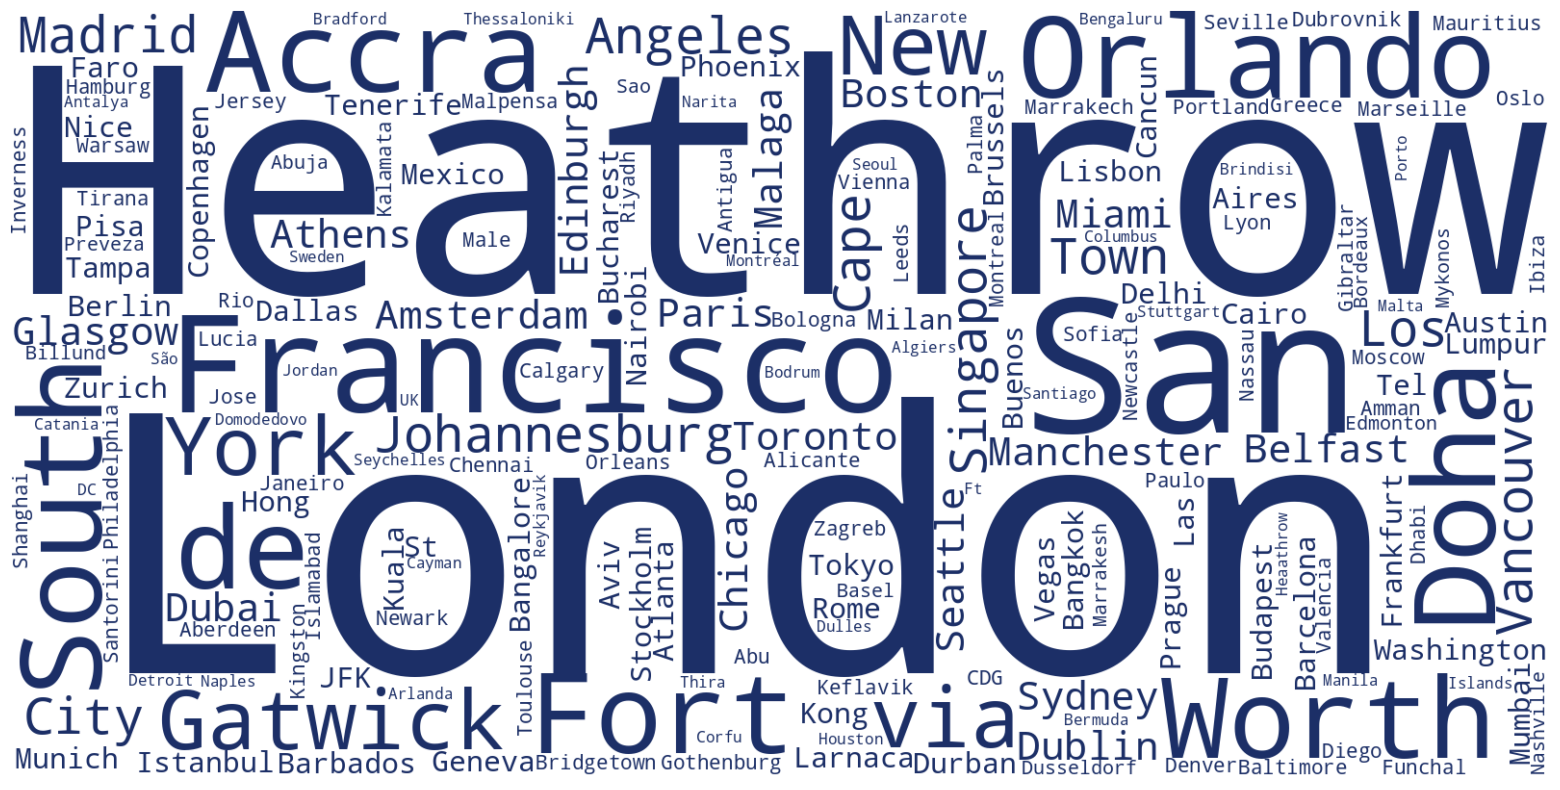

In [ ]:
# We will filter the reviews by route.
reviews = df['Route']

# Word processing
text = ' '.join(review for review in reviews)
words = text.split()
word_counts = Counter(words)
word_counts = {k: v for k, v in sorted(word_counts.items(), key=lambda item: item[1], reverse=True)}
text = ' '.join([k for k in word_counts.keys()])
stopwords = set(STOPWORDS)

# We will use the brand colors
color_image = np.array(Image.new('RGB', (1600, 800), "#1C2F67"))
image_colors = ImageColorGenerator(color_image)

# Create the word cloud
wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords, background_color="white", color_func=image_colors).generate(text)

# Show wordcloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### How have recommendations evolved over time?

In [ ]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and calculate the percentage of positive and negative recommendations
grouped = df.groupby('Date').agg({'Recommend': [lambda x: (x == 'yes').mean(), lambda x: (x == 'no').mean()]}).reset_index()

# Rename the columns for clarity
grouped.columns = ['Date', 'Positive', 'Negative']

# Create the line chart
fig = px.line(grouped, x='Date', y=['Positive', 'Negative'], labels={'value': 'Percentage of Recommendations'})
fig.show()

### How have the reviews evolved over the last few years?

In [ ]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the sentiment polarity of each review
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group the data by date and calculate the average sentiment polarity
grouped = df.groupby('Date').agg({'Polarity': 'mean'}).reset_index()

# Create the line chart
fig = px.line(grouped, x='Date', y='Polarity', labels={'Polarity': 'Average Sentiment Polarity'})
fig.show()

###How are the passenger types distributed with the seat type?
###What types of seats are most used by the types of travelers?

In [ ]:
# Group the data by type of traveler and calculate the percentage of each type of seat
grouped = df.groupby('Type of Traveler')['Seat Type'].value_counts(normalize=True).rename('Percentage').reset_index()

# Create the stacked bar chart
fig = px.bar(grouped, x='Type of Traveler', y='Percentage', color='Seat Type', text='Percentage')
fig.show()

###What type of travelers are those who have positive and negative travel reviews?
###Are their trips verified or not?

In [ ]:
# Calculate the sentiment polarity of each review
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Discretize the polarity column into positive and negative bins
df['Polarity Bin'] = pd.cut(df['Polarity'], bins=[-1, 0, 1], labels=['Negative', 'Positive'])

# Group the data by type of traveler, state of trip, and polarity bin
grouped = df.groupby(['Type of Traveler', 'State of Trip', 'Polarity Bin']).size().reset_index(name='Count')

# Calculate the frequency of each type of traveler and state of trip value
type_of_traveler_counts = df['Type of Traveler'].value_counts()
state_of_trip_counts = df['State of Trip'].value_counts()

# Sort the type of traveler and state of trip values by their frequency
type_of_traveler_order = type_of_traveler_counts.index.tolist()
state_of_trip_order = state_of_trip_counts.index.tolist()

# Create the stacked bar chart
fig = px.bar(grouped, x='Type of Traveler', y='Count', color='Polarity Bin', facet_col='State of Trip',
             color_discrete_sequence=["#1C2F67","#D03C54","#D98D97","#BBBABF"],
             hover_name='Type of Traveler',
             category_orders={'Type of Traveler': type_of_traveler_order,
                              'State of Trip': state_of_trip_order}) # Specify the desired order of the x-axis and facet column values
fig.show()

###What are the types of seats that have positive and negative travel reviews?
###Do they recommend the service?

In [ ]:
# Calculate the sentiment polarity of each review
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Discretize the polarity column into positive and negative bins
df['Polarity Bin'] = pd.cut(df['Polarity'], bins=[-1, 0, 1], labels=['Negative', 'Positive'])

# Group the data by seat type, recommend, and polarity bin
grouped = df.groupby(['Seat Type', 'Recommend', 'Polarity Bin']).size().reset_index(name='Count')

# Calculate the frequency of each seat type and recommend value
seat_type_counts = df['Seat Type'].value_counts()
recommend_counts = df['Recommend'].value_counts()

# Sort the seat type and recommend values by their frequency
seat_type_order = seat_type_counts.index.tolist()
recommend_order = recommend_counts.index.tolist()

# Create the stacked bar chart
fig = px.bar(grouped, x='Seat Type', y='Count', color='Polarity Bin', facet_col='Recommend',
             color_discrete_sequence=["#1C2F67","#D03C54","#D98D97","#BBBABF"],
             hover_name='Seat Type',
             category_orders={'Seat Type': seat_type_order,
                              'Recommend': recommend_order}) # Specify the desired order of the x-axis and facet column values
fig.show()

###What is the correlation of the columns of the dataset?
I put it at the end but it was the first graphic I made.

<ipython-input-321-8f07edc01497>:12: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



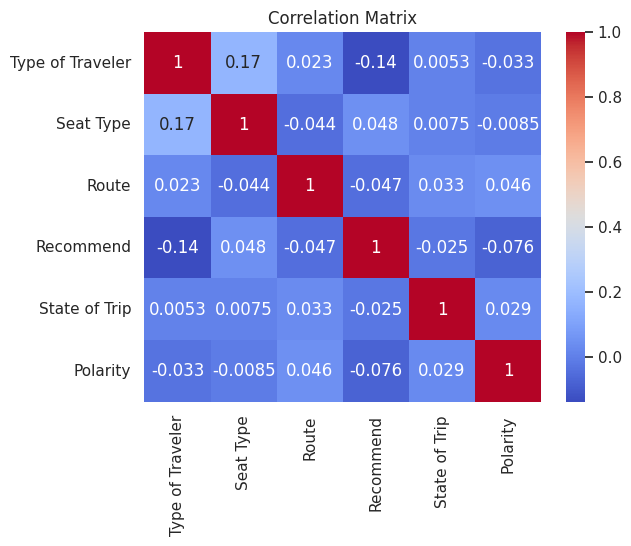

In [ ]:
# Create a copy of the df DataFrame
df_copy = df.copy()

# Convert categorical columns to numerical values
df_copy['Recommend'] = df_copy['Recommend'].apply(lambda x: 0 if x == 'yes' else 1)
df_copy['Type of Traveler'] = df_copy['Type of Traveler'].astype('category').cat.codes
df_copy['Seat Type'] = df_copy['Seat Type'].astype('category').cat.codes
df_copy['Route'] = df_copy['Route'].astype('category').cat.codes
df_copy['State of Trip'] = df_copy['State of Trip'].astype('category').cat.codes

# Calculate the correlation matrix
corr = df_copy.corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

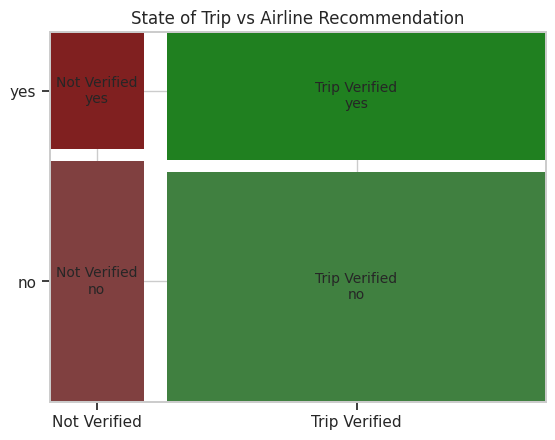

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['State of Trip'], df['Recommend'])

# Create the mosaic plot
mosaic(contingency_table.stack(), gap=0.05, title='State of Trip vs Airline Recommendation')
plt.show()

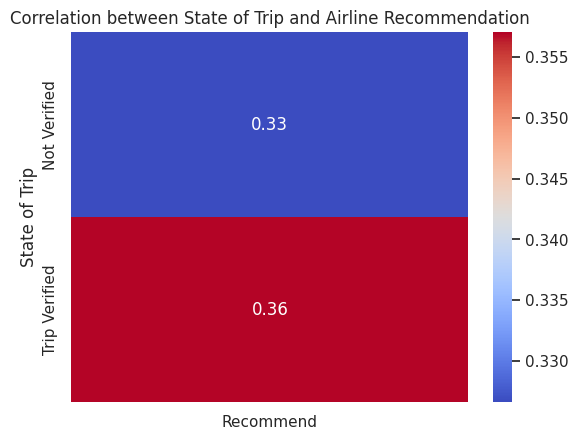

In [ ]:
# Convert the 'Recommend' column to a binary variable
df['Recommend'] = df['Recommend'].apply(lambda x: 1 if x == 'yes' else 0)

# Create a pivot table
pivot_table = df.pivot_table(values='Recommend', index='State of Trip', aggfunc='mean')

# Create the heatmap
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Correlation between State of Trip and Airline Recommendation')
plt.show()

In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('web_scraping_BA.csv', index=False)